# Project Goal:

- Create a world map with COVID-19 cases
- Examine the impact of COVID-19 on the energy consumption in Italy
- Plot some information about COVID-19 cases


## COVID-19 Cases around the world

#### Loading data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df_raw = pd.read_csv(url)

In [0]:
df_raw.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,4,6,9,19,32,39,39,53
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,13,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,669,669,818,1029,1219


## Transform COVID-19 data

In [0]:
def cleandata(df_raw):
  df_cleaned = df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'], value_name='Cases', var_name='Date')
  return df_cleaned

In [0]:
df = cleandata(df_raw)
df.tail(10)

,Province/State,Country/Region,Lat,Long,Date,Cases
16110,Recovered,Canada,0.000000,0.000000,3/26/20,0
16111,NaN,Laos,19.856270,102.495496,3/26/20,6
16112,NaN,Libya,26.335100,17.228331,3/26/20,1
16113,NaN,West Bank and Gaza,31.952200,35.233200,3/26/20,84
16114,NaN,Guinea-Bissau,11.803700,-15.180400,3/26/20,2
16115,NaN,Mali,17.570692,-3.996166,3/26/20,4
16116,NaN,Saint Kitts and Nevis,17.357822,-62.782998,3/26/20,2
16117,Northwest Territories,Canada,64.825500,-124.845700,3/26/20,1
16118,Yukon,Canada,64.282300,-135.000000,3/26/20,3
16119,NaN,Kosovo,42.602636,20.902977,3/26/20,71


In [0]:
print(df_raw.shape)
print(df.shape)

(248, 69)
(16120, 6)


## COVID-19 cases world map

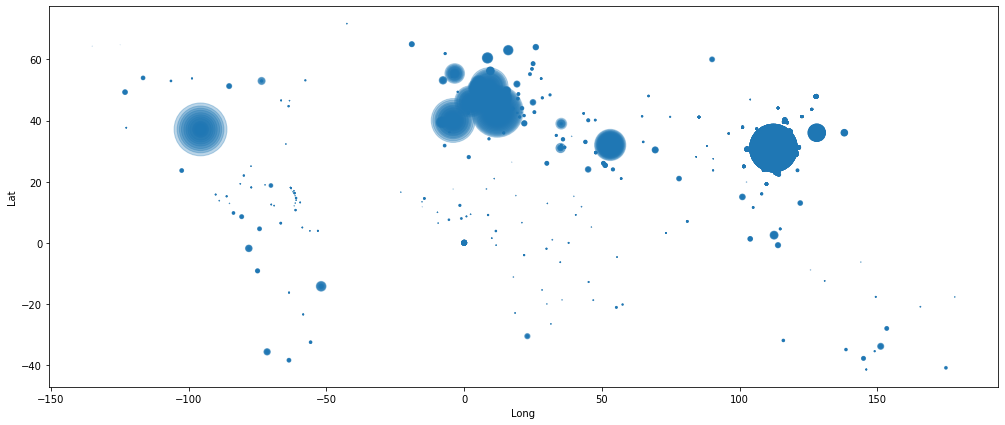

In [0]:
df.plot(kind='scatter', x='Long', y='Lat', figsize=(17,7), s=df['Cases']/30, alpha=0.3)

In [0]:
cd 'drive/My Drive/Colab Notebooks/covid-19/COVID-19'

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/covid-19/COVID-19'
/content/drive/My Drive/Colab Notebooks/covid-19/COVID-19


In [0]:
ls

Corona_ADek.ipynb    Italy_Energy_20.csv  README.md
Italy_Energy_19.csv  LICENSE              wrldmap.jpg


Text(0.5, 0.98, 'COVID-19 Cases around the world')

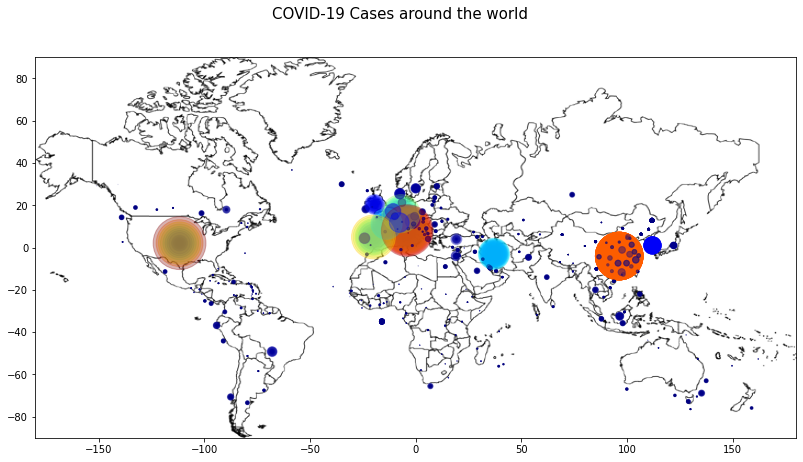

In [0]:
img = plt.imread('wrldmap.jpg')
fig, ax = plt.subplots(figsize=(17,7))
ax.imshow(img, extent=[-180, 180, -90, 90])
ax.scatter(x=df['Long']-16, y=df['Lat']-35, alpha=0.3, s=df['Cases']/30, c=df['Cases'], cmap=plt.get_cmap('jet'))
fig.suptitle('COVID-19 Cases around the world', fontsize=15)


In [0]:
ls

Corona_ADek.ipynb    Italy_Energy_20.csv  README.md
Italy_Energy_19.csv  LICENSE              wrldmap.jpg


In [0]:
energy_2019 = pd.read_csv('Italy_Energy_19.csv')
energy_2020 = pd.read_csv('Italy_Energy_20.csv')

## Clean energy consumption data

In [0]:
def tansform_date(row):
  return row.split('-')[0].strip()

def transform_df(df, resample):
  # Cleaning data
  df = df.drop('Day-ahead Total Load Forecast [MW] - Italy (IT)', axis=1)
  df['Actual Total Load [MW] - Italy (IT)'] = df['Actual Total Load [MW] - Italy (IT)'].replace('-', np.NaN)
  df = df.dropna()
  df = df.rename({'Actual Total Load [MW] - Italy (IT)': 'Total Load [MW]'}, axis=1)
  df['Total Load [MW]'] = pd.to_numeric(df['Total Load [MW]'])
  
  # Creating time series
  df['Time (CET)'] = df['Time (CET)'].apply(lambda x: tansform_date(x))
  df['Time (CET)'] = pd.to_datetime(df['Time (CET)'], format='%d.%m.%Y %H:%M')
  df = df.set_index('Time (CET)')
  
  # Resampling data daily
  df = df.resample(resample).sum()
  return df

In [0]:
daily_2019 = transform_df(energy_2019, 'D')
daily_2019 = daily_2019.loc[:'2019-03-12']
daily_2019

,Total Load [MW]
Time (CET),
2019-01-01,578708.0
2019-01-02,745075.0
2019-01-03,792723.0
2019-01-04,821707.0
2019-01-05,726533.0
...,...
2019-03-08,834337.0
2019-03-09,685538.0
2019-03-10,610936.0


In [0]:
daily_2020 = transform_df(energy_2020, 'D')
daily_2020 = daily_2020.loc[:'2020-03-12']
daily_2020

,Total Load [MW]
Time (CET),
2020-01-01,554946
2020-01-02,696136
2020-01-03,723707
2020-01-04,662333
2020-01-05,605811
...,...
2020-03-08,624320
2020-03-09,808114
2020-03-10,830510


In [0]:
monthly_2019 = transform_df(energy_2019, 'M')
monthly_2019

,Total Load [MW]
Time (CET),
2019-01-31,26589991.0
2019-02-28,23704533.0
2019-03-31,24271996.0
2019-04-30,22043413.0
2019-05-31,23129237.0
2019-06-30,25547177.0
2019-07-31,29007637.0
2019-08-31,24552027.0
2019-09-30,24455380.0


Text(0, 0.5, 'Total Load [MW]')

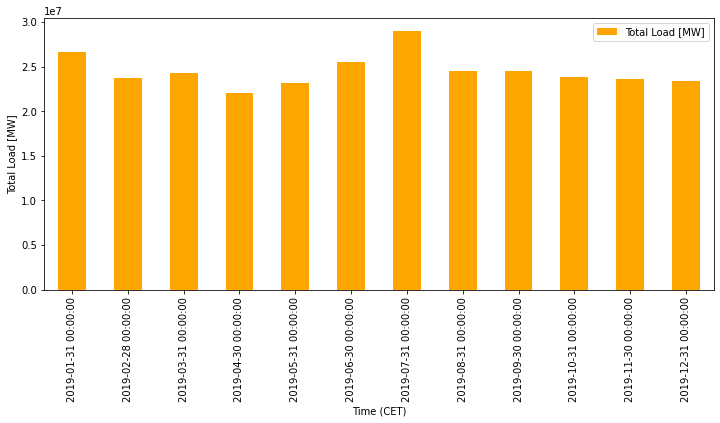

In [0]:
monthly_2019.plot(kind='bar', figsize=(12, 5), color='orange')
plt.ylabel('Total Load [MW]')

### Zmiana danych godzinowych na dane dzienne

In [0]:
daily_2019

,Total Load [MW]
Time (CET),
2019-01-01,578708.0
2019-01-02,745075.0
2019-01-03,792723.0
2019-01-04,821707.0
2019-01-05,726533.0
...,...
2019-03-08,834337.0
2019-03-09,685538.0
2019-03-10,610936.0


In [0]:
daily_2020.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
      

In [0]:
daily_2019 = daily_2019.loc['2019-01-07':]
daily_2020 = daily_2020.loc['2020-01-06':'2020-03-10']

Text(0, 0.5, 'Total Load [MW]')

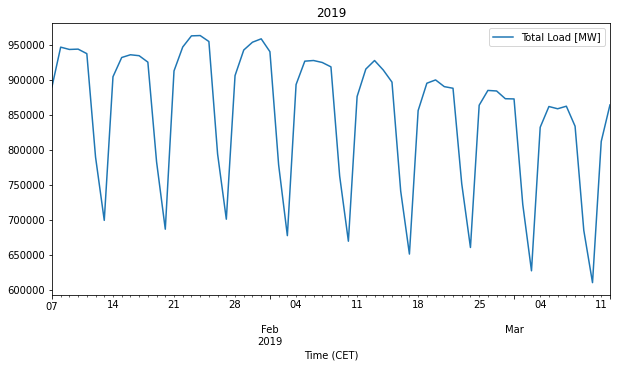

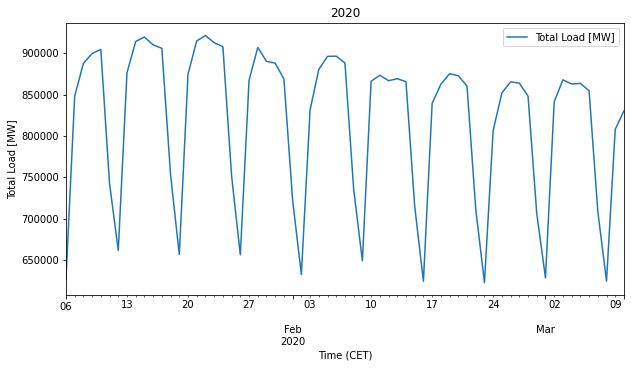

In [0]:
daily_2019.plot(figsize=(10,5))
plt.title('2019')

daily_2020.plot(figsize=(10, 5))
plt.title('2020')
plt.ylabel('Total Load [MW]')

In [0]:
print(daily_2019.shape)
print(daily_2020.shape)

(65, 1)
(65, 1)


In [0]:
idx = daily_2019.index.strftime('%m-%d')
idx

Index(['01-07', '01-08', '01-09', '01-10', '01-11', '01-12', '01-13', '01-14',
       '01-15', '01-16', '01-17', '01-18', '01-19', '01-20', '01-21', '01-22',
       '01-23', '01-24', '01-25', '01-26', '01-27', '01-28', '01-29', '01-30',
       '01-31', '02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07',
       '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15',
       '02-16', '02-17', '02-18', '02-19', '02-20', '02-21', '02-22', '02-23',
       '02-24', '02-25', '02-26', '02-27', '02-28', '03-01', '03-02', '03-03',
       '03-04', '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11',
       '03-12'],
      dtype='object')

In [0]:
y_vs_y = pd.DataFrame({'2019': daily_2019['Total Load [MW]'].values, '2020': daily_2020['Total Load [MW]'].values}, index=idx)
y_vs_y

,2019,2020
01-07,890497.0,626258
01-08,947259.0,848243
01-09,943955.0,887957
01-10,944428.0,899961
01-11,937965.0,904857
...,...,...
03-08,834337.0,854868
03-09,685538.0,709015
03-10,610936.0,624320
03-11,812551.0,808114


Text(0.5, 0, 'Date')

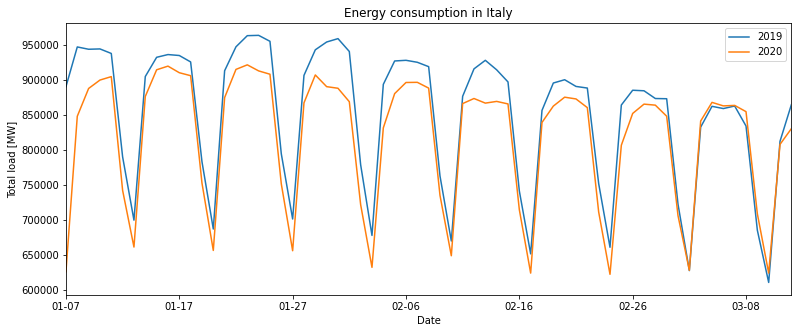

In [0]:
y_vs_y.plot(figsize=(13,5))
plt.title('Energy consumption in Italy')
plt.ylabel('Total load [MW]')
plt.xlabel('Date')

In [0]:
y_vs_y.index

Index(['01-07', '01-08', '01-09', '01-10', '01-11', '01-12', '01-13', '01-14',
       '01-15', '01-16', '01-17', '01-18', '01-19', '01-20', '01-21', '01-22',
       '01-23', '01-24', '01-25', '01-26', '01-27', '01-28', '01-29', '01-30',
       '01-31', '02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07',
       '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15',
       '02-16', '02-17', '02-18', '02-19', '02-20', '02-21', '02-22', '02-23',
       '02-24', '02-25', '02-26', '02-27', '02-28', '03-01', '03-02', '03-03',
       '03-04', '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11',
       '03-12'],
      dtype='object')

Text(0.5, 0, 'Date')

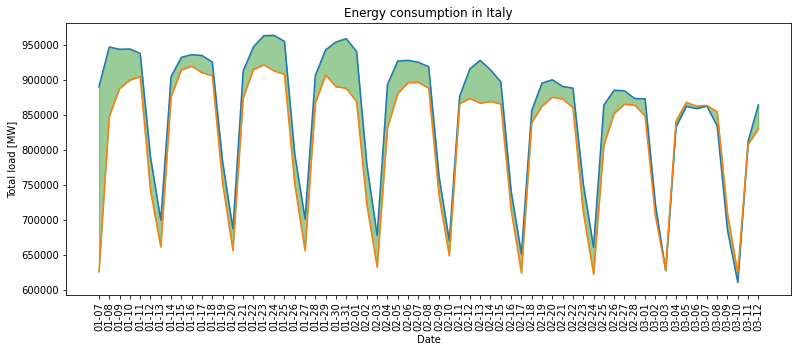

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 5))

plt.plot(y_vs_y.index, y_vs_y['2019'])
plt.plot(y_vs_y.index, y_vs_y['2020'])
plt.xticks(rotation=90)

plt.fill_between(y_vs_y.index, y_vs_y['2020'], y_vs_y['2019'], color='green', alpha=0.4)
plt.title('Energy consumption in Italy')
plt.ylabel('Total load [MW]')
plt.xlabel('Date')

In [0]:
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Cases
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0
6,NaN,Argentina,-38.4161,-63.6167,1/22/20,0
7,NaN,Armenia,40.0691,45.0382,1/22/20,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0


In [0]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [0]:
italy = df.loc[df['Country/Region']=='Italy', :]
italy['Date'] = pd.to_datetime(italy['Date'])
italy = italy.set_index('Date')
italy = italy.drop('Province/State', axis=1)
italy = italy.loc['2020-01-06':'2020-03-10']
italy.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country/Region,Lat,Long,Cases
Date,,,,
2020-03-06,Italy,43.0,12.0,4636
2020-03-07,Italy,43.0,12.0,5883
2020-03-08,Italy,43.0,12.0,7375
2020-03-09,Italy,43.0,12.0,9172
2020-03-10,Italy,43.0,12.0,10149


Text(0, 0.5, 'Cases')

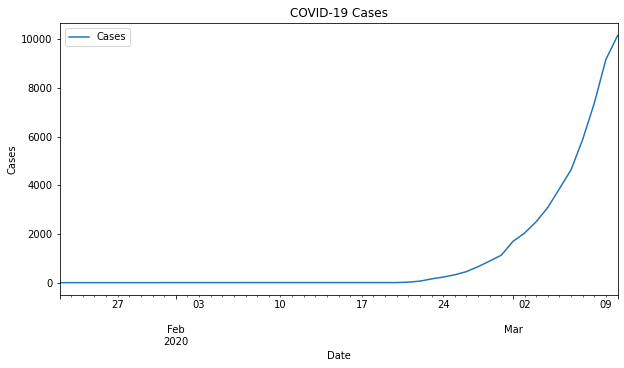

In [0]:
italy.plot(y='Cases', figsize=(10,5))
plt.title('COVID-19 Cases')
plt.ylabel('Cases')

In [0]:
italy['Cases'].shape

(49,)

In [0]:
x = daily_2019.loc['2019-01-23':'2019-03-12']['Total Load [MW]']
y = daily_2020.loc['2020-01-22':'2020-03-10']['Total Load [MW]']
idx_2 = x.index.strftime('%m-%d')

In [0]:
corona = pd.DataFrame({'2019': x.values, '2020': y.values, 'Cases': italy['Cases'].values}, index=idx_2)
corona.tail(10)

,2019,2020,Cases
03-03,627838.0,628270,1694
03-04,832806.0,841456,2036
03-05,862466.0,868086,2502
03-06,859255.0,863069,3089
03-07,862900.0,863763,3858
03-08,834337.0,854868,4636
03-09,685538.0,709015,5883
03-10,610936.0,624320,7375
03-11,812551.0,808114,9172
03-12,864739.0,830510,10149


## Energy consumption vs COVID-19 cases in Italy

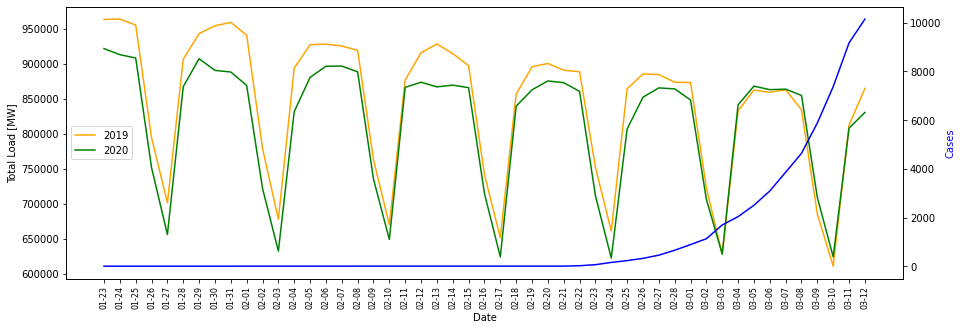

In [0]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

ax1.plot(idx_2, corona['2019'], color='orange', label='2019')
ax1.plot(idx_2, corona['2020'], color='g', label='2020')
ax2.plot(idx_2, corona['Cases'], 'b-')

ax1.legend(loc='center left')

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Load [MW]')
ax2.set_ylabel('Cases', color='b')
ax1.set_xticklabels(idx_2, rotation='vertical', size=8)
plt.show()

In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Country/Region', 'Cases', 'Date']]
df

,Country/Region,Cases,Date
0,Afghanistan,0,2020-01-22
1,Albania,0,2020-01-22
2,Algeria,0,2020-01-22
3,Andorra,0,2020-01-22
4,Angola,0,2020-01-22
...,...,...,...
16115,Mali,4,2020-03-26
16116,Saint Kitts and Nevis,2,2020-03-26
16117,Canada,1,2020-03-26
16118,Canada,3,2020-03-26


In [0]:
by_country = df.pivot_table(index='Date', columns='Country/Region', values='Cases', aggfunc='sum')
by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,...,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0


In [0]:
by_country = by_country.loc['2020-02-20':]

Text(0.5, 1.0, 'COVID-19 cases in some countries')

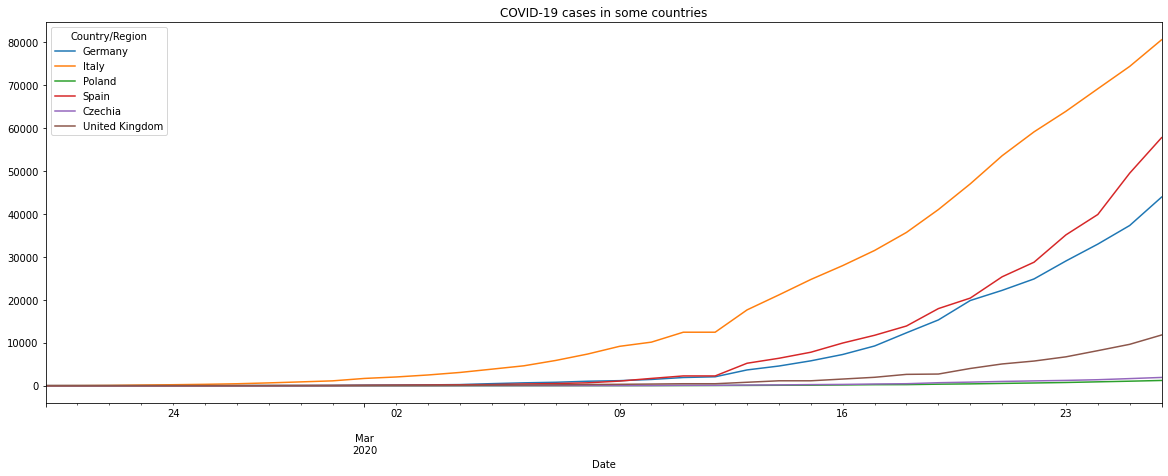

In [0]:
countries = ['Germany', 'Italy', 'Poland', 'Spain', 'Czechia', 'United Kingdom']

by_country[countries].plot(figsize=(20,7))
plt.title('COVID-19 cases in some countries')

Text(0.5, 1.0, 'COVID-19 cases in some countries (log scale)')

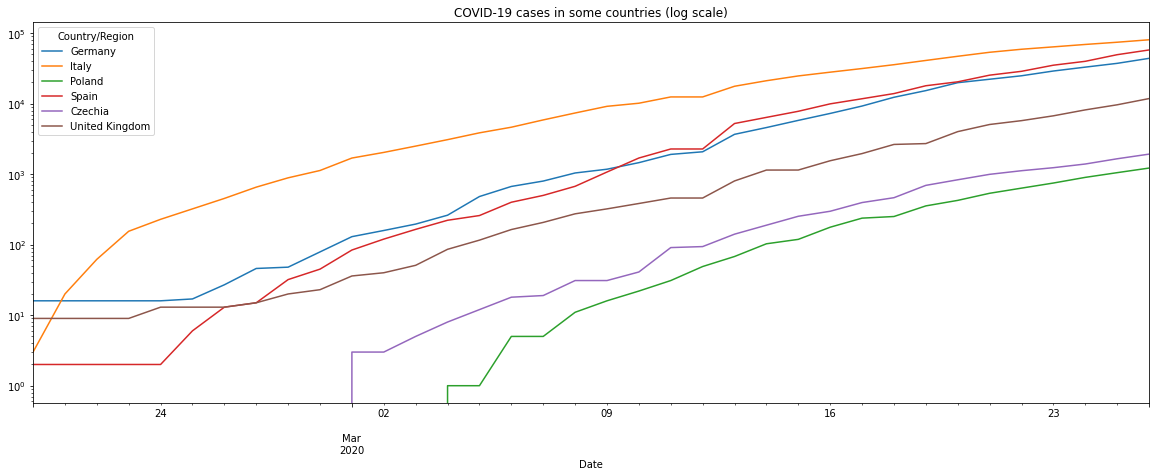

In [0]:
by_country[countries].plot(figsize=(20,7))
plt.yscale('log')
plt.title('COVID-19 cases in some countries (log scale)')

## Shape comparision of COVID-19 cases curves for some countries

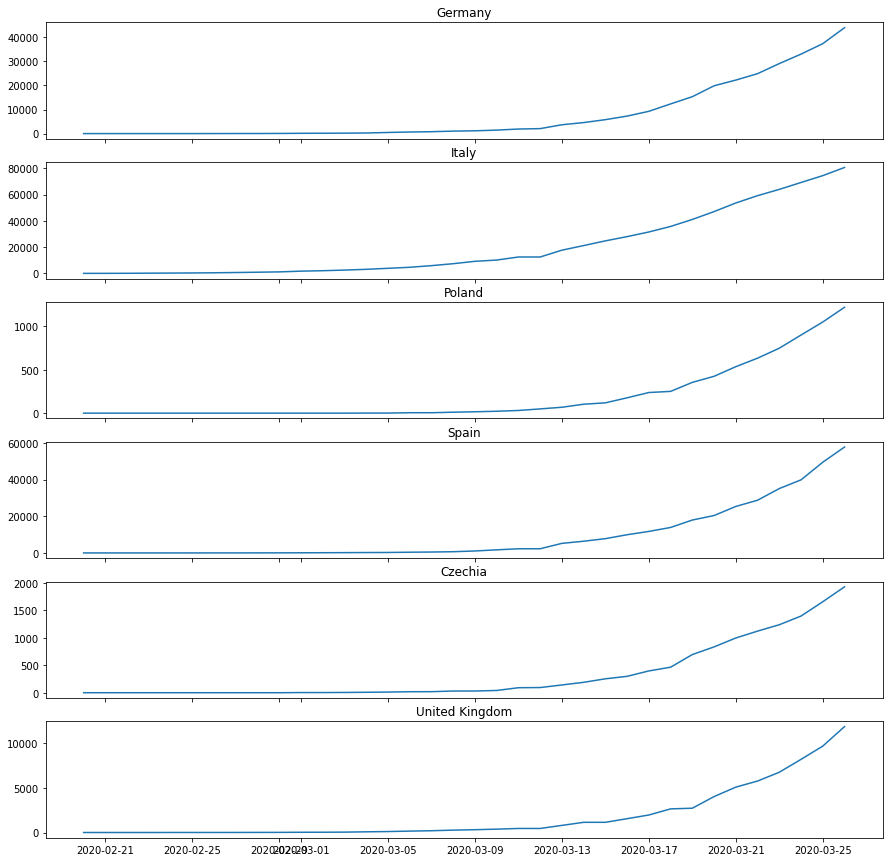

In [0]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(len(countries), 1, sharex=True, sharey=False)
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(len(countries)):
  eval(f'ax{i+1}.plot(by_country[countries[{i}]])')
  eval(f'ax{i+1}.set_title(countries[{i}])')
  


In [0]:
by_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,...,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-22,40,89,201,113,2,1,266,194,1549,3582,65,4,334,27,14,76,3401,0,2,2,24,126,1546,88,187,75,3,84,40,1469,3,1,632,81435,231,3,30,134,14,254,...,0,2,1,175,511,67,222,7,455,185,414,1,274,28768,82,2,5,1934,7474,1,169,12,599,1,16,50,75,1236,33276,1,73,153,5745,158,43,70,113,52,3,3
2020-03-23,40,104,230,133,3,3,301,235,1682,4474,72,4,377,33,17,81,3743,1,5,2,27,136,1924,91,201,99,3,87,56,2088,3,1,746,81498,277,4,36,158,25,315,...,0,3,1,187,562,79,249,7,509,186,442,1,402,35136,97,2,5,2046,8795,1,195,12,721,1,18,51,89,1529,43847,9,73,198,6726,162,46,77,123,59,3,3
2020-03-24,74,123,264,164,3,3,387,249,2044,5283,87,5,392,39,18,81,4269,1,6,2,29,166,2247,104,218,114,3,91,66,2790,3,3,922,81591,378,4,45,177,73,382,...,0,3,1,187,767,86,303,7,558,204,480,1,554,39885,102,3,7,2286,9877,1,215,12,827,1,20,57,114,1872,53740,9,97,248,8164,162,50,84,134,59,3,3
2020-03-25,84,146,302,188,3,3,387,265,2364,5588,93,5,419,39,18,86,4937,2,6,2,32,176,2554,109,242,146,4,96,75,3251,3,3,1142,81661,470,4,48,201,80,442,...,2,3,1,208,900,99,384,7,631,216,528,1,709,49515,102,3,8,2526,10897,5,235,12,934,1,23,60,173,2433,65778,14,145,333,9640,189,60,91,141,59,12,3
2020-03-26,94,174,367,224,4,7,502,290,2810,6909,122,9,458,44,18,86,6235,2,6,2,43,191,2985,114,264,152,4,96,75,4042,3,3,1306,81782,491,4,51,231,96,495,...,2,3,1,208,1012,105,384,7,683,226,562,2,927,57786,106,3,8,2840,11811,5,252,13,1045,1,23,65,197,3629,83836,14,196,333,11812,217,75,107,153,84,16,3


In [0]:
count_countries = by_country.loc['2020-03-20', countries]
count_countries

Country/Region
Germany           19848
Italy             47021
Poland              425
Spain             20410
Czechia             833
United Kingdom     4014
Name: 2020-03-20 00:00:00, dtype: int64

In [0]:
current = df.loc[(df['Country/Region'].isin(countries)) & (df['Date'] == '2020-03-20'), :]
current

,Country/Region,Cases,Date
14475,Czechia,833,2020-03-20
14504,Germany,19848,2020-03-20
14521,Italy,47021,2020-03-20
14567,Poland,425,2020-03-20
14585,Spain,20410,2020-03-20
14601,United Kingdom,2,2020-03-20
14602,United Kingdom,3,2020-03-20
14603,United Kingdom,14,2020-03-20
14604,United Kingdom,10,2020-03-20
14605,United Kingdom,1,2020-03-20


Text(0.5, 1.08, 'COVID-19 Cases in some countries')

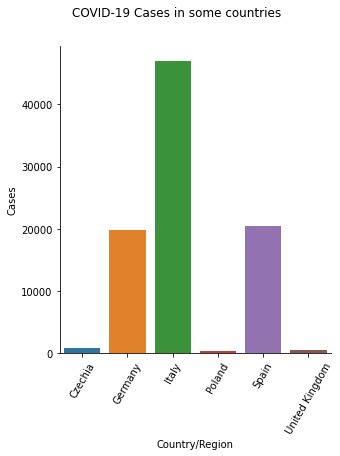

In [0]:
sns_fig = sns.catplot(x='Country/Region', y='Cases', data=current, kind='bar', ci=None)
sns_fig.set_xticklabels(rotation=60)
sns_fig.fig.suptitle('COVID-19 Cases in some countries', y=1.08)

In [0]:
!git config --global user.email "jakub.k.tomaszewski@gmail.com"
!git config --global user.name "JakubTomaszewski"

In [394]:
!git commit -m "project finished"

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
	modified:   .gitignore

Untracked files:
	Corona_ADek.ipynb
	Italy_Energy_20.csv
	README.md
	wrldmap.jpg

no changes added to commit


In [399]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   Corona_ADek.ipynb
	new file:   README.md
	new file:   wrldmap.jpg

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   .gitignore
	modified:   Corona_ADek.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Italy_Energy_20.csv



In [411]:
!git status

ERROR! Session/line number was not unique in database. History logging moved to new session 64
On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   Corona_ADek.ipynb
	new file:   README.md
	new file:   wrldmap.jpg

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   .gitignore
	modified:   Corona_ADek.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Italy_Energy_19.csv
	Italy_Energy_20.csv



In [410]:
cat .gitignore

Italy_Energy_19.csv Italy_Energy_20.csv


In [409]:
!echo "Italy_Energy_19.csv Italy_Energy_20.csv" > .gitignore

ERROR! Session/line number was not unique in database. History logging moved to new session 63


In [404]:
!nano .gitignore

/bin/bash: nano: command not found
